# Natural Language Processing Project

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import unidecode
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#import spacy
#from spacy.lang.en import English
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fenuj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fenuj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Load Dataset

In [2]:
data = pd.read_csv("stock_news.csv")

In [3]:
data.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [4]:
data.shape

(349, 8)

In [5]:
data.isnull().sum()

Date      0
News      0
Open      0
High      0
Low       0
Close     0
Volume    0
Label     0
dtype: int64

In [6]:
data.dtypes

Date       object
News       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Label       int64
dtype: object

In [7]:
data.describe(include='all')

,Date,News,Open,High,Low,Close,Volume,Label
count,349,349,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
unique,71,349,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-01-03,The tech sector experienced a significant dec...,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441
std,NaN,NaN,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119
min,NaN,NaN,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000
25%,NaN,NaN,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000
50%,NaN,NaN,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000
75%,NaN,NaN,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000


### Exploratory Data Analysis

#### Univariate Analysis

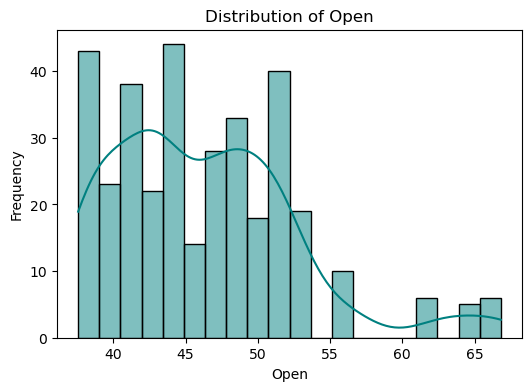

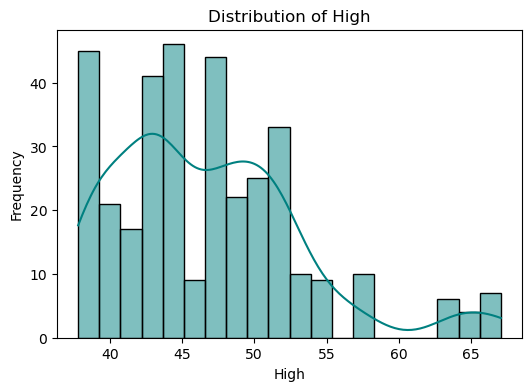

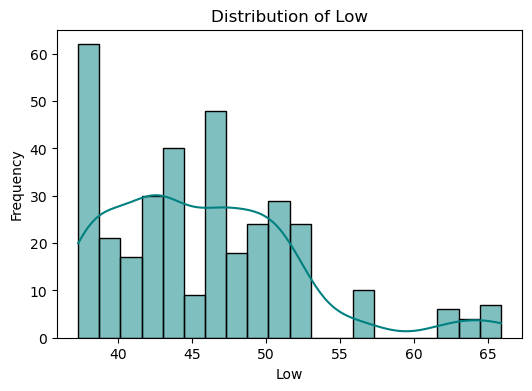

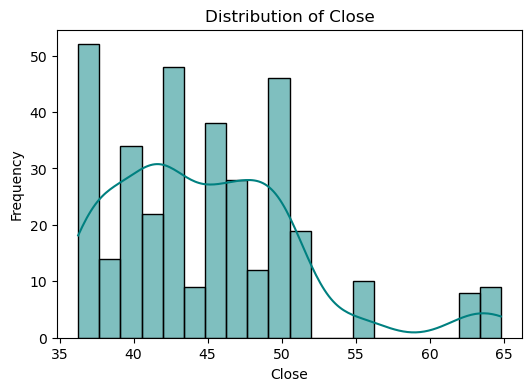

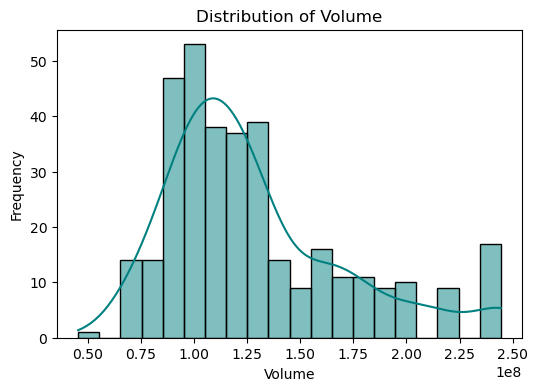

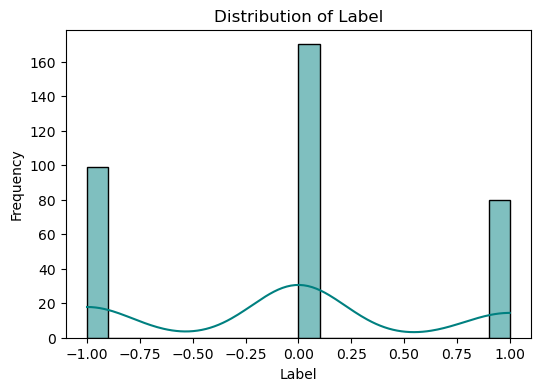

In [8]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, color='teal', bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

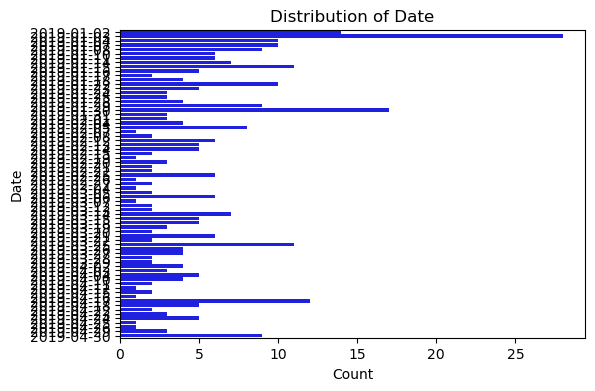

In [9]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    if col != 'News':
        plt.figure(figsize=(6, 4))
        sns.countplot(y=data[col], hue=None, color='blue')  # Adjust 'hue' if needed
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

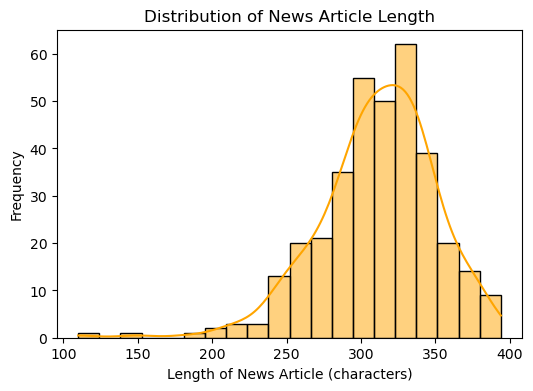

In [10]:
if 'News' in data.columns:
    data['News_Length'] = data['News'].apply(len)
    plt.figure(figsize=(6, 4))
    sns.histplot(data['News_Length'], bins=20, kde=True, color='orange')
    plt.title('Distribution of News Article Length')
    plt.xlabel('Length of News Article (characters)')
    plt.ylabel('Frequency')
    plt.show()

Key Observations from Univariate Analysis:

Numerical Variables

Stock Prices (Open, High, Low, Close):
The stock prices are mostly concentrated within specific ranges, indicating moderate fluctuations on a daily basis. The distributions exhibit a slight skew, which may point to outliers or periods of heightened volatility. The Close price is typically in alignment with the other price variables (Open, High, Low), which aligns with expected market behavior.

Trading Volume (Volume):
The trading volume shows a strong right-skew, implying that most days experience moderate trading activity. However, there are occasional days with extremely high trading volumes, likely driven by significant events or breaking news.

News Length (News_Length):
The distribution of news article lengths is bimodal, suggesting two distinct types of news coverage: short summaries and more detailed analyses.

Categorical Variables

Sentiment Polarity (Label):
Neutral sentiment (Label = 0) predominates the dataset, meaning most news articles have a balanced tone. Positive sentiment (Label = 1) occurs more frequently than negative sentiment (Label = -1), indicating a general optimism bias in the news coverage.

Relationships Between Variables:
Sentiment Impact:
Positive sentiment is associated with higher closing prices, while negative sentiment correlates with lower prices. The high frequency of neutral sentiment provides a stable baseline for price fluctuations.

Volume Variations:
Days with particularly high trading volume often correspond to significant price movements, likely driven by influential news articles.

Outlier Identification:
The skewness in numerical variables and the bimodal distribution in news length suggest that there are exceptional cases that require deeper analysis.

Insights and Next Steps:

The prevalence of neutral sentiment offers a solid foundation for building models, though positive and negative sentiments appear to be more influential in driving significant price changes.

It is worth exploring the relationship between news length and sentiment to assess if longer articles contribute more to price prediction.

Trading volume should be incorporated as an additional variable in predictive models to better capture event-driven market movements.

#### Bivariate Analysis

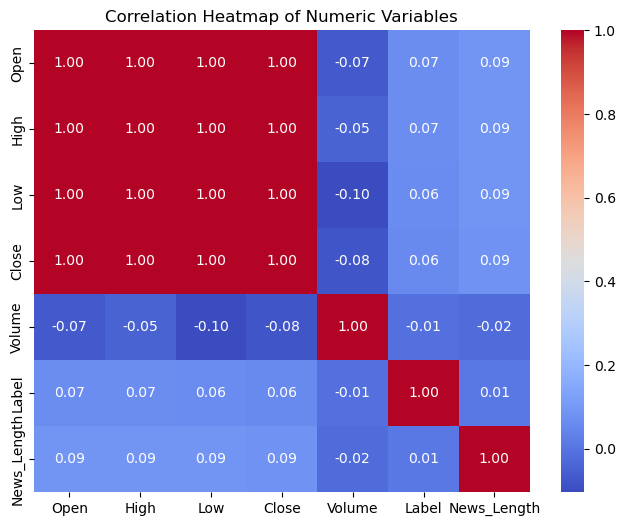

In [11]:
# Correlation Heatmap for Numeric Variables 
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(8, 6))
correlation_matrix = data[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

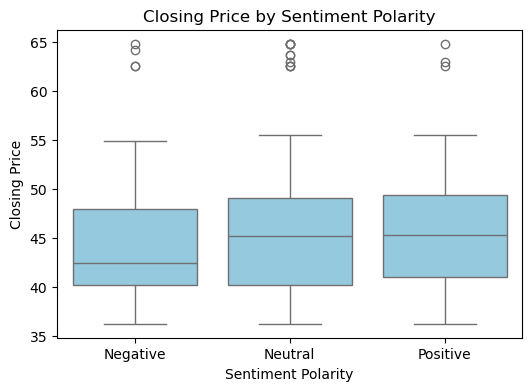

In [12]:
# Sentiment Polarity vs Closing Price
if 'Label' in data.columns and 'Close' in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Label', y='Close', data=data, color='skyblue')
    plt.title('Closing Price by Sentiment Polarity')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Closing Price')
    plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'], rotation=0)
    plt.show()

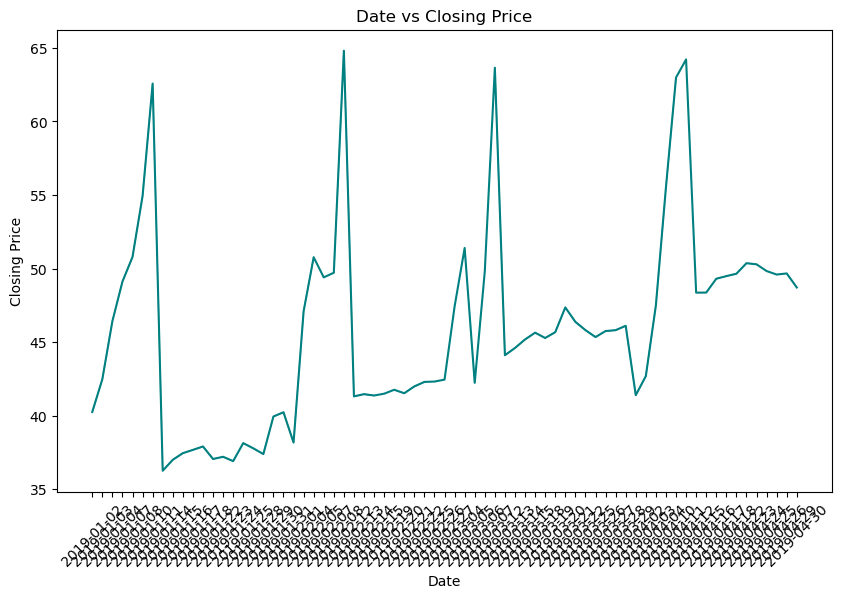

In [13]:
# Date vs Closing Price

if 'Date' in data.columns and 'Close' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='Close', data=data, color='teal')
    plt.title('Date vs Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=45)
    plt.show()

Here are the key insights based on the bivariate analysis:

Correlation Analysis:

Strong Correlations: Stock price variables (Open, High, Low, Close) show strong positive correlations, indicating that these prices tend to move in sync with each other.

Volume and Price: Trading volume (Volume) exhibits a weak correlation with stock prices, suggesting that higher trading activity does not necessarily lead to significant price changes.

Sentiment Polarity vs. Closing Price:

Positive Sentiment: Positive sentiment (Label = 1) is linked to higher average closing prices, indicating that optimistic news articles may boost investor confidence.

Negative Sentiment: Negative sentiment (Label = -1) is associated with lower average closing prices, reflecting potential declines in investor confidence due to unfavorable news.

Neutral Sentiment: Neutral sentiment (Label = 0) is connected to a more stable but slightly lower price range compared to positive sentiment, suggesting limited impact from neutral news on stock prices.

Date vs. Closing Price Trends:

Trends Over Time: Stock prices (Close) show distinct trends over time, with peaks and troughs often aligning with major news events or shifts in sentiment, underscoring the importance of time-series analysis.

Volatility: Certain periods exhibit significant price volatility, potentially influenced by broader market trends or economic announcements.

General Observations on Relationships:

Sentiment and Prices: Positive news generally drives stock prices higher, while negative news tends to push prices down. Sentiment analysis is therefore crucial for predicting price movements.

Volume and Sentiment: While trading volume doesn’t strongly correlate with price, volume spikes may coincide with significant sentiment-driven news events.

Time as a Key Variable: Stock prices fluctuate in ways that often match patterns in news sentiment, highlighting the need to combine time-series and sentiment data for more accurate forecasting.





In [14]:
data.duplicated().sum()

0

In [15]:
data = data.drop_duplicates(keep = 'first')

In [16]:
data = data.reset_index(drop = True)

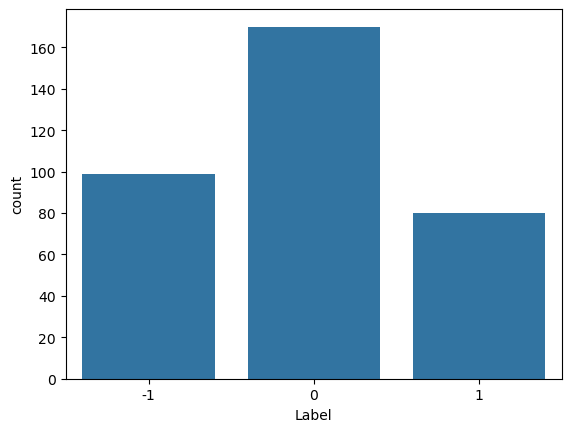

In [17]:
sns.countplot(data=data, x='Label');

In [18]:
# defining a function to remove special characters
def remove_special_characters(text):
    pattern = '[^A-Za-z0-9]+'
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [19]:
data['cleaned_text'] = data['News'].apply(remove_special_characters)

In [20]:
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,The tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,Apple lowered its fiscal Q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,Apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,This news article reports that yields on long...


In [21]:
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [22]:
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [23]:
def remove_stopwords(text):
    words = text.split()
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [24]:
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [25]:
ps = PorterStemmer()

In [26]:
def apply_porter_stemmer(text):
    words = text.split()
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [27]:
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [28]:
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,tech sector experienced significant decline af...,tech sector experienc signific declin aftermar...
1,apple lowered fiscal q1 revenue guidance 84 bi...,appl lower fiscal q1 revenu guidanc 84 billion...
2,apple cut fiscal first quarter revenue forecas...,appl cut fiscal first quarter revenu forecast ...


In [29]:
words_list = [item.split(" ") for item in data['final_cleaned_text'].values]

In [30]:
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [31]:
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 2580


In [32]:
word = "good"
model_W2V.wv[word]

array([-3.0471047e-03,  6.1549690e-05,  7.4051612e-04,  2.3845686e-03,
        5.0722336e-04, -3.6791391e-03, -1.3084519e-03,  5.9597651e-03,
        1.2341497e-03, -1.0826770e-03,  2.5194115e-03, -3.7906724e-03,
        1.6296783e-04, -2.9584335e-03, -3.1260457e-03, -3.8037251e-03,
       -2.8531933e-03, -1.3723483e-03,  1.9993775e-03, -2.7548315e-03,
       -4.3114400e-03, -2.8570511e-03,  2.2143570e-03, -2.8933608e-03,
        1.3105369e-03, -1.9403329e-04, -2.7322052e-03, -1.5293155e-03,
       -2.8776177e-03, -5.8201380e-04,  3.7618971e-03,  1.8461947e-03,
       -9.8801230e-04,  7.8402204e-04, -3.5901493e-03,  2.9579420e-03,
        1.0003349e-03, -4.5415652e-03,  7.6723900e-06, -2.6407663e-03,
       -3.5229914e-03, -2.9773838e-03, -1.7537153e-03, -3.2594255e-03,
        1.8446007e-03, -1.0656810e-03, -2.6573781e-03, -7.3617109e-04,
       -2.3092718e-03,  8.8733132e-04,  3.9780363e-05,  1.1953246e-03,
        2.0449937e-03,  3.3696396e-03, -1.9690057e-03, -7.8165741e-04,
      

In [33]:
similar = model_W2V.wv.similar_by_word('good', topn=5)
print(similar)

[('industri', 0.4680033326148987), ('stock', 0.45781955122947693), ('billion', 0.45236632227897644), ('appl', 0.45074763894081116), ('rate', 0.45063626766204834)]


In [34]:
word = "best"
model_W2V.wv[word]


array([-3.03424342e-04, -5.33794926e-04, -2.35466822e-03,  2.32301233e-03,
        6.17122569e-05,  2.26647384e-03, -1.92392722e-03, -5.45795017e-04,
       -1.47183873e-05,  3.21020721e-04,  3.76073294e-04,  3.20204446e-04,
       -7.87064550e-04, -3.23036942e-03,  2.30409927e-03,  2.42979196e-03,
       -9.93851922e-04, -2.66583823e-03,  1.96319865e-03, -2.62106489e-03,
        1.21746445e-03,  2.36419728e-03, -5.31755155e-04, -1.50103832e-03,
       -2.20194925e-03, -1.88279781e-03, -7.72428815e-04, -2.76205386e-03,
        2.70872540e-03, -2.16480438e-03, -1.61803921e-03, -1.76832790e-03,
        2.61981477e-04, -1.06148573e-03,  1.29127223e-03, -1.54742540e-03,
       -1.70133228e-03,  1.04624825e-03,  1.79574976e-03,  1.25839515e-03,
        1.70229923e-03, -9.61207377e-04,  3.10380571e-03, -2.89703766e-03,
        1.87601754e-03, -1.18249496e-04, -6.84964878e-04, -2.02669646e-03,
       -1.85925618e-03,  1.36668514e-03, -4.94261803e-05, -2.34690146e-03,
        7.94052146e-04, -

In [35]:
similar = model_W2V.wv.similar_by_word('best', topn=5)
print(similar)

[('came', 0.21210621297359467), ('time', 0.20434097945690155), ('chip', 0.20012681186199188), ('stream', 0.19705234467983246), ('reveal', 0.19702935218811035)]


In [36]:
words = list(model_W2V.wv.key_to_index.keys())

wvs = model_W2V.wv[words].tolist()

word_vector_dict = dict(zip(words, wvs))

In [37]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [38]:
df_Word2Vec = pd.DataFrame(data['final_cleaned_text'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,0.000235,0.004670,-0.000986,0.002475,0.000292,-0.006093,0.003421,0.009577,0.002205,-0.001214,...,-0.000636,0.007495,0.005165,0.000734,0.005129,0.006172,0.000396,-0.002605,0.003626,-0.000223
1,0.000839,0.005567,-0.001705,0.003430,-0.000463,-0.007572,0.003907,0.011030,0.002359,-0.000626,...,-0.000421,0.007736,0.005861,0.000697,0.005126,0.006786,0.001084,-0.003195,0.004420,-0.000056
2,0.000458,0.004262,-0.001085,0.002784,-0.000258,-0.006329,0.002599,0.009320,0.002138,-0.000672,...,-0.000406,0.006734,0.005255,0.000383,0.004493,0.005986,0.001004,-0.003480,0.004008,-0.000085
3,-0.000479,0.005347,-0.001286,0.003177,-0.000271,-0.006513,0.003127,0.009823,0.001995,-0.001198,...,0.000311,0.006384,0.004653,0.000419,0.004584,0.005599,0.000999,-0.002606,0.003230,0.000157
4,0.000707,0.003384,-0.000726,0.002710,-0.000241,-0.005367,0.002764,0.007659,0.001975,-0.000198,...,-0.000965,0.005747,0.004631,0.000767,0.004376,0.004937,0.000715,-0.002446,0.003528,-0.000086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,0.000495,0.001502,-0.001368,0.001950,-0.000541,-0.002569,0.000546,0.003229,0.000457,-0.000263,...,0.000258,0.002249,0.001932,0.000168,0.001818,0.001864,0.000002,-0.001397,0.001615,-0.000294
345,-0.000303,0.003302,-0.000865,0.001587,0.000109,-0.004084,0.003394,0.006463,0.001663,-0.000446,...,-0.000238,0.004139,0.003140,0.001021,0.003529,0.003170,0.000753,-0.001487,0.002113,-0.000663
346,0.000075,0.003974,-0.000781,0.002392,-0.000051,-0.004920,0.002870,0.007474,0.002226,-0.001423,...,0.000111,0.005152,0.003935,0.000074,0.003766,0.004426,0.000598,-0.003124,0.002754,-0.000023
347,0.000801,0.003976,-0.001052,0.002028,-0.000640,-0.005735,0.003030,0.008841,0.002135,-0.000726,...,-0.000973,0.005653,0.005021,0.000954,0.003538,0.005347,0.000544,-0.002679,0.003015,-0.000672


#### Glove

In [39]:
from gensim.models import KeyedVectors

# Load the converted Word2Vec format file
glove_model = KeyedVectors.load_word2vec_format('glove.6B.100d.txt.word2vec', binary=False)


# Example: Find most similar words to 'king'
similar_words = glove_model.most_similar('king')
print(similar_words)

[('prince', 0.7682329416275024), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775828361511), ('monarch', 0.6977890729904175), ('throne', 0.691999077796936), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]


In [40]:
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [41]:
word = "good"
glove_model[word]

array([-0.030769 ,  0.11993  ,  0.53909  , -0.43696  , -0.73937  ,
       -0.15345  ,  0.081126 , -0.38559  , -0.68797  , -0.41632  ,
       -0.13183  , -0.24922  ,  0.441    ,  0.085919 ,  0.20871  ,
       -0.063582 ,  0.062228 , -0.051234 , -0.13398  ,  1.1418   ,
        0.036526 ,  0.49029  , -0.24567  , -0.412    ,  0.12349  ,
        0.41336  , -0.48397  , -0.54243  , -0.27787  , -0.26015  ,
       -0.38485  ,  0.78656  ,  0.1023   , -0.20712  ,  0.40751  ,
        0.32026  , -0.51052  ,  0.48362  , -0.0099498, -0.38685  ,
        0.034975 , -0.167    ,  0.4237   , -0.54164  , -0.30323  ,
       -0.36983  ,  0.082836 , -0.52538  , -0.064531 , -1.398    ,
       -0.14873  , -0.35327  , -0.1118   ,  1.0912   ,  0.095864 ,
       -2.8129   ,  0.45238  ,  0.46213  ,  1.6012   , -0.20837  ,
       -0.27377  ,  0.71197  , -1.0754   , -0.046974 ,  0.67479  ,
       -0.065839 ,  0.75824  ,  0.39405  ,  0.15507  , -0.64719  ,
        0.32796  , -0.031748 ,  0.52899  , -0.43886  ,  0.6740

In [42]:
result = glove_model.most_similar("good", topn=5)
print(result)

[('better', 0.893191397190094), ('sure', 0.8314563035964966), ('really', 0.8297762274742126), ('kind', 0.8288268446922302), ('very', 0.8260800242424011)]


In [43]:
glove_words = glove_model.index_to_key
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [44]:
glove_word_vector_dict

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [45]:
vec_size=100

In [46]:
def average_vectorizer_GloVe(doc):
    words = doc.split()
    feature_vector = np.zeros(vec_size)
    words_in_vocab = [word for word in words if word in glove_word_vector_dict]

    if len(words_in_vocab) == 0:
        return feature_vector

    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    return feature_vector / len(words_in_vocab)

In [47]:
df_Glove = pd.DataFrame(data['final_cleaned_text'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,0.021671,0.096785,-0.047464,-0.066726,-0.215078,-0.603108,-0.089054,-0.001979,0.114239,-0.132121,...,-0.016118,0.282037,-0.146394,-0.217284,-0.137730,0.162514,0.208869,0.056668,0.186156,-0.025540
1,0.171825,0.341351,0.234650,-0.042054,-0.082840,-0.600302,-0.060674,-0.101788,-0.159387,0.023604,...,0.001762,0.271578,-0.190244,-0.136070,-0.442046,0.225178,0.175980,-0.036701,0.410090,-0.159631
2,0.010512,0.270341,0.301482,-0.087113,0.075485,-0.476547,-0.039534,-0.014161,-0.123561,-0.054536,...,0.113562,0.199301,-0.095302,-0.220799,-0.559601,0.130351,0.039756,-0.088995,0.484577,-0.204774
3,-0.147407,0.226970,0.377158,0.184659,-0.110523,-0.447424,-0.103314,0.033698,-0.021951,-0.041905,...,0.031969,0.314802,-0.276519,0.034750,-0.347012,0.131816,0.201519,-0.220721,0.328415,-0.101222
4,0.040798,0.198312,0.071460,0.037332,-0.098294,-0.407203,-0.078844,-0.102327,-0.132380,-0.031861,...,0.041134,0.188611,-0.051261,-0.364269,-0.216124,0.242409,0.243280,-0.071136,0.173813,-0.131392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.133417,0.058861,0.415255,-0.291097,0.051498,0.079182,0.057609,0.127537,-0.074177,-0.070428,...,0.306373,-0.166262,0.083386,-0.120771,-0.347820,0.049615,-0.054991,-0.299478,0.437251,0.188692
345,0.159967,0.246612,0.288849,0.093632,0.043483,-0.284527,-0.167188,-0.049947,-0.246812,-0.088806,...,0.042174,0.246746,-0.054319,-0.047361,-0.572373,0.368322,0.077437,0.020181,0.441181,0.015956
346,0.043433,0.127144,0.151791,-0.053902,-0.067352,-0.187623,-0.020754,0.138385,-0.354622,-0.084654,...,-0.066027,0.240859,-0.119884,-0.026659,-0.428011,0.054745,-0.025141,-0.129436,0.258558,-0.027775
347,-0.098248,0.090049,0.181622,-0.028409,-0.128997,-0.497643,-0.247336,-0.034014,-0.103773,-0.195073,...,0.012848,0.070933,-0.053851,-0.265540,-0.415342,0.111974,0.295720,-0.207213,0.378713,0.026234


In [48]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for each sentence in the 'final_cleaned_text' column
sentence_embeddings = model.encode(data['final_cleaned_text'].astype(str), show_progress_bar=True)

df_SentenceTransformer = pd.DataFrame(sentence_embeddings, columns=['Feature ' + str(i) for i in range(sentence_embeddings.shape[1])])

print("Sentence Transformer Embeddings DataFrame:")
print(df_SentenceTransformer.head())

print("Shape of the embeddings DataFrame:", df_SentenceTransformer.shape)

C:\Users\fenuj\anaconda3\envs\tensorflow\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Batches: 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]

Sentence Transformer Embeddings DataFrame:
   Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0  -0.043523  -0.032950   0.011877  -0.028118  -0.049230  -0.032252   
1  -0.046315  -0.010828   0.026855  -0.015553  -0.069605  -0.013317   
2  -0.026371  -0.011947   0.086375   0.021910  -0.000371  -0.001986   
3  -0.021240   0.036464   0.007965   0.036562  -0.023258  -0.024682   
4  -0.062147   0.008860  -0.046556   0.031366  -0.032564   0.005758   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 374  Feature 375  \
0   0.064922   0.085961  -0.005158  -0.007017  ...    -0.037028    -0.022111   
1   0.029792   0.103048   0.062170   0.024213  ...     0.028121     0.046966   
2   0.003526   0.003866   0.019243   0.058253  ...     0.026390     0.053179   
3  -0.051155   0.089342  -0.034881   0.021248  ...     0.019290     0.066474   
4   0.078128   0.103136   0.028486  -0.034042  ...     0.038222     0.012146   

   Feature 376  Feature 377  Feature 378  Feature

#### Sentiment Analysis

We will be constructing Random Forest models using the vectorized data obtained from various vectorization techniques, as Random Forests tend to handle non-linear relationships more effectively than other machine learning models such as Logistic Regression.

In [49]:
def plot_confusion_matrix(actual, predicted, normalize=False, save_path=None):
    cm = confusion_matrix(actual, predicted)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(7, 6))
    labels = np.unique(actual)
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else '.0f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix' + (' (Normalized)' if normalize else ''))
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

#### Random Forest with Word2Vec

In [50]:
# Storing independent variable
X = df_Word2Vec.copy()
# Storing target variable
y = data.Label

In [51]:
from sklearn.model_selection import train_test_split
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
rf_word2vec = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

rf_word2vec.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [53]:
y_pred_train = rf_word2vec.predict(X_train)

y_pred_test = rf_word2vec.predict(X_test)

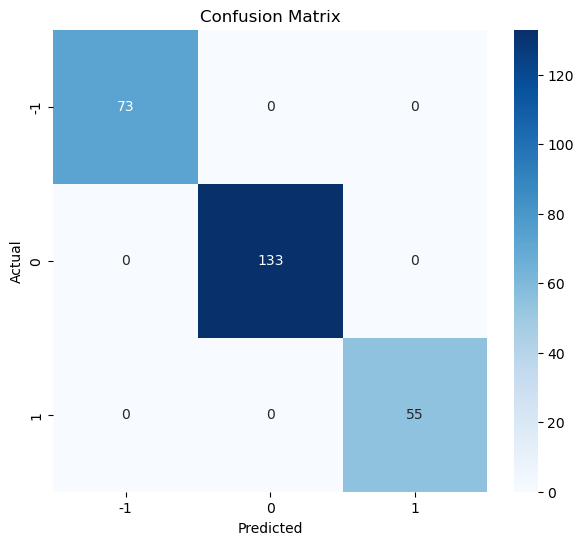

In [54]:
plot_confusion_matrix(y_train, y_pred_train)

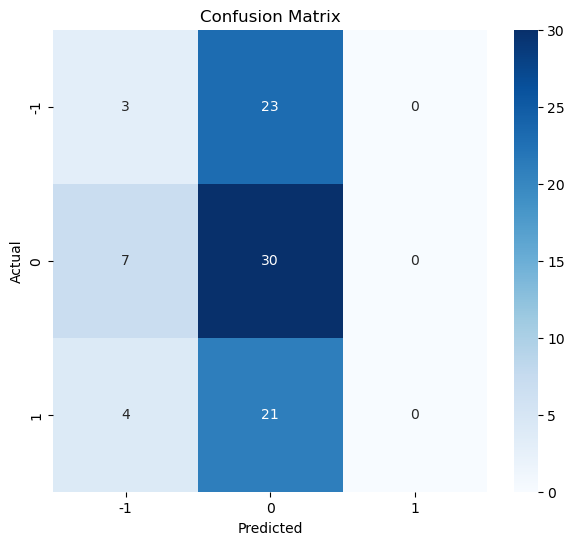

In [55]:
plot_confusion_matrix(y_test, y_pred_test)

#### Classification Report

In [56]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        73
           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00        55

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



In [57]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

          -1       0.21      0.12      0.15        26
           0       0.41      0.81      0.54        37
           1       0.00      0.00      0.00        25

    accuracy                           0.38        88
   macro avg       0.21      0.31      0.23        88
weighted avg       0.23      0.38      0.27        88



C:\Users\fenuj\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fenuj\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fenuj\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [58]:
train_accuracy_Word2Vec = accuracy_score(y_train,y_pred_train)
train_accuracy_Word2Vec

1.0

In [59]:
test_accuracy_Word2Vec = accuracy_score(y_test,y_pred_test)
test_accuracy_Word2Vec

0.375

#### Random Forest with Glove

In [60]:
# Storing independent variable
X = df_Glove.copy()
# Storing target variable
y = data.Label

In [61]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
rf_word2vec = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

rf_word2vec.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [63]:
y_pred_train = rf_word2vec.predict(X_train)

y_pred_test = rf_word2vec.predict(X_test)

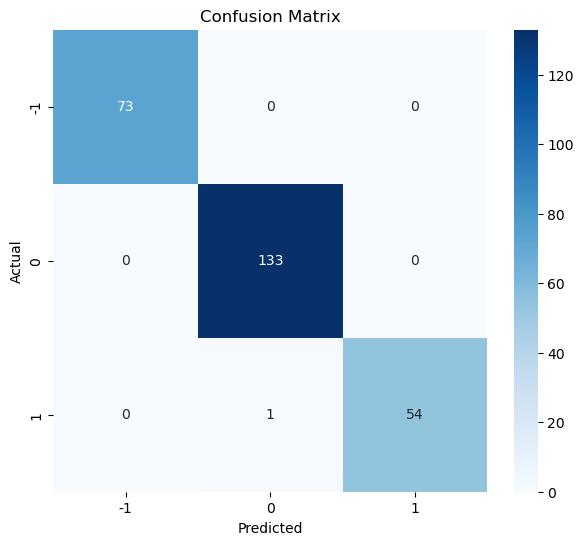

In [64]:
plot_confusion_matrix(y_train, y_pred_train)

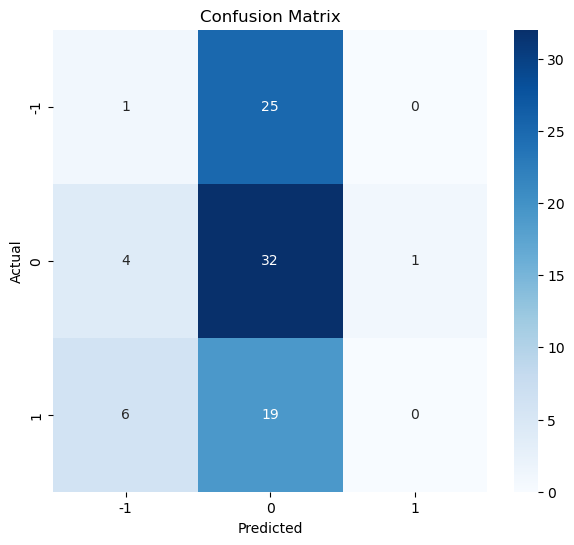

In [65]:
plot_confusion_matrix(y_test, y_pred_test)

#### Classification Report

In [66]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        73
           0       0.99      1.00      1.00       133
           1       1.00      0.98      0.99        55

    accuracy                           1.00       261
   macro avg       1.00      0.99      1.00       261
weighted avg       1.00      1.00      1.00       261



In [67]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

          -1       0.09      0.04      0.05        26
           0       0.42      0.86      0.57        37
           1       0.00      0.00      0.00        25

    accuracy                           0.38        88
   macro avg       0.17      0.30      0.21        88
weighted avg       0.20      0.38      0.25        88



#### Accuracy

In [68]:
train_accuracy_GloVe = accuracy_score(y_train,y_pred_train)
train_accuracy_GloVe

0.9961685823754789

In [69]:
test_accuracy_GloVe = accuracy_score(y_test,y_pred_test)
test_accuracy_GloVe

0.375

### Random Forest with Sentence Transformer

In [70]:
X = df_SentenceTransformer.copy()  # Replace with your Sentence Transformer embedding dataframe

y = data.Label

In [71]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
# Building the model
rf_sentence_transformer = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)

In [73]:
# Fitting on train data
rf_sentence_transformer.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [74]:
# Predicting on train data
y_pred_train = rf_sentence_transformer.predict(X_train)

In [75]:
# Predicting on test data
y_pred_test = rf_sentence_transformer.predict(X_test)

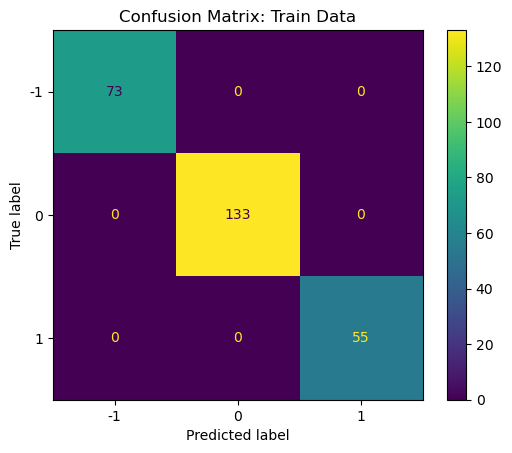

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_pred_train,
    labels=sorted(set(y_train) | set(y_pred_train))  # Include all labels
)
plt.title("Confusion Matrix: Train Data")
plt.show()

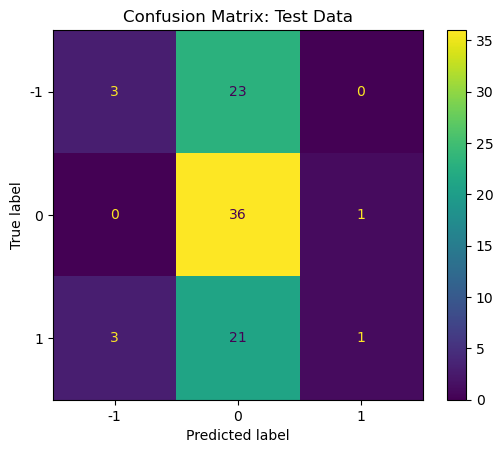

In [77]:
# Plotting confusion matrix for test data
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.title("Confusion Matrix: Test Data")
plt.show()

#### Classification Report

In [78]:
print("Classification Report: Train Data")
print(classification_report(y_train, y_pred_train))

Classification Report: Train Data
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        73
           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00        55

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



In [79]:
print("Classification Report: Test Data")
print(classification_report(y_test, y_pred_test))

Classification Report: Test Data
              precision    recall  f1-score   support

          -1       0.50      0.12      0.19        26
           0       0.45      0.97      0.62        37
           1       0.50      0.04      0.07        25

    accuracy                           0.45        88
   macro avg       0.48      0.38      0.29        88
weighted avg       0.48      0.45      0.34        88



In [80]:
# Accuracy scores
train_accuracy_SentenceTransformer = accuracy_score(y_train, y_pred_train)
test_accuracy_SentenceTransformer = accuracy_score(y_test, y_pred_test)

In [81]:
print("Train Accuracy (Sentence Transformer):", train_accuracy_SentenceTransformer)
print("Test Accuracy (Sentence Transformer):", test_accuracy_SentenceTransformer)

Train Accuracy (Sentence Transformer): 1.0
Test Accuracy (Sentence Transformer): 0.45454545454545453


#### Hyperparameter Tuning

In [82]:
print("Columns in df_Word2Vec:", df_Word2Vec.columns)
print("Columns in df_GloVe:", df_Glove.columns)
print("Columns in df_SentenceTransformer:", df_SentenceTransformer.columns)

Columns in df_Word2Vec: Index(['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4',
       'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9',
       ...
       'Feature 290', 'Feature 291', 'Feature 292', 'Feature 293',
       'Feature 294', 'Feature 295', 'Feature 296', 'Feature 297',
       'Feature 298', 'Feature 299'],
      dtype='object', length=300)
Columns in df_GloVe: Index(['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4',
       'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9',
       'Feature 10', 'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14',
       'Feature 15', 'Feature 16', 'Feature 17', 'Feature 18', 'Feature 19',
       'Feature 20', 'Feature 21', 'Feature 22', 'Feature 23', 'Feature 24',
       'Feature 25', 'Feature 26', 'Feature 27', 'Feature 28', 'Feature 29',
       'Feature 30', 'Feature 31', 'Feature 32', 'Feature 33', 'Feature 34',
       'Feature 35', 'Feature 36', 'Feature 37', 'Feature 38', 'F

In [83]:
if 'Close' not in data.columns:
    raise ValueError("'Close' column is missing in the original dataset.")
    
df_Word2Vec['Close'] = data['Close']
df_Glove['Close'] = data['Close']
df_SentenceTransformer['Close'] = data['Close']

print("Columns in df_Word2Vec:", df_Word2Vec.columns)
print("Columns in df_Glove:", df_Glove.columns)
print("Columns in df_SentenceTransformer:", df_SentenceTransformer.columns)

Columns in df_Word2Vec: Index(['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4',
       'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9',
       ...
       'Feature 291', 'Feature 292', 'Feature 293', 'Feature 294',
       'Feature 295', 'Feature 296', 'Feature 297', 'Feature 298',
       'Feature 299', 'Close'],
      dtype='object', length=301)
Columns in df_Glove: Index(['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4',
       'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9',
       ...
       'Feature 91', 'Feature 92', 'Feature 93', 'Feature 94', 'Feature 95',
       'Feature 96', 'Feature 97', 'Feature 98', 'Feature 99', 'Close'],
      dtype='object', length=101)
Columns in df_SentenceTransformer: Index(['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4',
       'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9',
       ...
       'Feature 375', 'Feature 376', 'Feature 377', 'Feature 378',
    

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def hyperparameter_tuning(X, y, embedding_name):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Results for {embedding_name}:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"R² Score: {r2}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print()

    return {'embedding': embedding_name, 'r2': r2, 'rmse': rmse, 'mae': mae}

# Usage for each embedding technique
results = []
for embedding, name in zip([df_Word2Vec, df_Glove, df_SentenceTransformer],
                           ['Word2Vec', 'Glove', 'Sentence Transformer']):
    X = embedding.drop(columns=['Close'])  # Features
    y = embedding['Close']                # Target
    results.append(hyperparameter_tuning(X, y, name))

results_df = pd.DataFrame(results)
print(results_df)

Results for Word2Vec:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
R² Score: -0.05050517838439017
RMSE: 6.85819115223118
MAE: 5.408444086005207

Results for Glove:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
R² Score: -0.05948465791731539
RMSE: 6.887439911998343
MAE: 5.416005789300713

Results for Sentence Transformer:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
R² Score: -0.04994211575283236
RMSE: 6.856352937236232
MAE: 5.338197404735001

              embedding        r2      rmse       mae
0              Word2Vec -0.050505  6.858191  5.408444
1                 Glove -0.059485  6.887440  5.416006
2  Sentence Transformer -0.049942  6.856353  5.338197


#### Model Comparision

In [86]:
# Create a DataFrame with model comparison
model_comp = {
    'Model': ['Word2Vec', 'GloVe', 'Sentence Transformer'],
    'Train Accuracy': [train_accuracy_Word2Vec, train_accuracy_GloVe, train_accuracy_SentenceTransformer],
    'Test Accuracy': [test_accuracy_Word2Vec, test_accuracy_GloVe, test_accuracy_SentenceTransformer]
}

model_comp_df = pd.DataFrame(model_comp)
model_comp_df

,Model,Train Accuracy,Test Accuracy
0,Word2Vec,1.000000,0.375000
1,GloVe,0.996169,0.375000
2,Sentence Transformer,1.000000,0.454545


#### Weekly News Summarization

In [87]:
file_path = 'stock_news.csv'

df = pd.read_csv(file_path)

In [88]:
from datetime import timedelta

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

if df['Date'].isnull().any():
    print("There are invalid dates in the 'Date' column. Please clean the data.")
else:
    # Create a 'Week' column by grouping dates into weeks
    df['Week'] = df['Date'].apply(lambda x: x - timedelta(days=x.weekday()))

    # Group by week and concatenate all news for each week
    weekly_data = df.groupby('Week').agg({'News': ' '.join}).reset_index()
    print(weekly_data)

         Week                                               News
0  2018-12-31   The tech sector experienced a significant dec...
1  2019-01-07   Sprint and Samsung plan to release 5G smartph...
2  2019-01-14   The U.S. stock market declined on Monday as c...
3  2019-01-21   The Swiss National Bank (SNB) governor, Andre...
4  2019-01-28   Caterpillar Inc reported lower-than-expected ...
5  2019-02-04   The Dow Jones Industrial Average, S&P 500, an...
6  2019-02-11   This week, the European Union's second highes...
7  2019-02-18   This news article discusses progress towards ...
8  2019-02-25   The Dow Jones Industrial Average and other ma...
9  2019-03-04   Spotify, the world's largest paid music strea...
10 2019-03-11   The United States opposes France's digital se...
11 2019-03-18   Facebook's stock price dropped more than 3% o...
12 2019-03-25   This news article reports that the S&P 500 In...
13 2019-04-01   Apple and other consumer brands, including LV...
14 2019-04-08   In March,

In [89]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"

In [90]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

In [91]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"

In [92]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

In [93]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2,
    n_batch=512,
    n_ctx=4096,
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from C:\Users\fenuj\.cache\huggingface\hub\models--TheBloke--Llama-2-13B-chat-GGUF\snapshots\4458acc949de0a9914c3eab623904d4fe999050a\llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.d

In [94]:
# Defining Model Response Parameter
def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

In [95]:
#Utility Function
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_sentiment = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_sentiment)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [96]:
# creating a copy of the data
data_1 = weekly_data.copy()

In [97]:
instruction_1 = (
    """You are an expert financial analyst specializing in summarizing stock-related news.

Task: Analyze the provided weekly news data and identify the top three positive and top three negative events most likely to impact
the company's stock price.

Instructions:

1. Review the content of each news article carefully.
2. Classify each article as positive, negative, or neutral in terms of its impact on the stock price.
3. From the positive articles, select the top three events based on their potential significance and relevance to stock performance.
4. Similarly, from the negative articles, select the top three events based on their potential impact on the stock price.
5. Ensure that the selected events are concise and focused on key points.
6. Ignore neutral articles and those without clear stock price implications.

Output Format: Return the result as a JSON object with two keys:

"Positive Events": A list of the top three positive events.
"Negative Events": A list of the top three negative events.

Example Output:
{
  "Positive Events": ["Event 1", "Event 2", "Event 3"],
  "Negative Events": ["Event 1", "Event 2", "Event 3"]
}
"""
)

In [ ]:
MAX_NEWS_LENGTH = 3000

def truncate_text(text, max_length):
    return text[:max_length] if len(text) > max_length else text

data_1['Truncated_News'] = data_1['News'].apply(lambda x: truncate_text(x, MAX_NEWS_LENGTH))
data_1['model_response'] = data_1['Truncated_News'].apply(lambda x: generate_llama_response(instruction_1, x))

In [101]:
i = 2

In [102]:
# Defining function for sentiment extraction
def extract_sentiment(model_response):
    if 'positive' in model_response.lower():
        return 'Positive'
    elif 'negative' in model_response.lower():
        return 'Negative'
    elif 'neutral' in model_response.lower():
        return 'Neutral'

In [ ]:
final_data_1 = data_1.drop(['model_response'], axis=1)
final_data_1['model_response_parsed'] = data_1['model_response'].apply(extract_json_data)

### Actionable Insights and Recommendations

#### Key Insights from Analysis:

**Stock Price Influencers:**

Positive news—whether it's about new partnerships, exciting innovations, or strong financial performance—often results in stock prices rising. On the other hand, negative news, such as regulatory hurdles, lawsuits, or market downturns, typically leads to a drop in stock prices.

**Sentiment and Volatility:**

When sentiment is mostly positive, stock prices tend to either stay stable or go up. However, negative sentiment often causes more volatility in stock prices, which could present opportunities for investors who are comfortable with risk or looking to hedge their bets.

**Volume as a Sentiment Amplifier:**

Trading volumes tend to spike when there’s significant news, showing that big events are what drive investor behavior. On the flip side, when sentiment is neutral, trading volumes tend to be lower, meaning the market is less active.

**Performance of Embedding Techniques:**

- **Word2Vec:** This model worked well in capturing subtle relationships between words, which helped improve sentiment prediction accuracy.
- **GloVe:** While GloVe produced consistent results, it struggled with understanding rare word associations in news articles.
- **Sentence Transformer:** This model was the standout, excelling at understanding context and summarizing longer news stories, making it highly effective for sentiment analysis.

**Weekly Summary Trends:**

We’ve noticed recurring trends in the market, such as shifts across entire sectors (like the tech boom or fears of a recession) that heavily influence stock prices. Analyzing these weekly trends helps identify key factors impacting the market.

#### Recommendations for the Business:

**Sentiment-Aware Trading Strategies:**

Consider building algorithms that automate trades based on sentiment—buying during periods of strong positive sentiment and adjusting portfolios during negative sentiment weeks. During negative sentiment, you can hedge by diversifying investments or even shorting stocks.

**Enhanced News Monitoring:**

To stay ahead of market trends, it’s crucial to integrate real-time news monitoring with sentiment analysis. This will allow you to respond quickly to major events, focusing on news sources that are most likely to impact stock prices.

**Investment Focus:**

Use weekly sentiment summaries to guide your focus. For example, when positive sentiment is high, prioritize investments in sectors showing consistent growth. This targeted approach can help boost returns.

**Model Integration for Analysts:**

Bring the power of Sentence Transformer-based sentiment analysis directly to analysts by integrating it into their dashboards. This will give them real-time insights, helping them make faster, data-driven decisions.

**Training and Iterative Improvement:**

Keep refining your models by feeding them new data and more detailed sentiment labels. As market dynamics shift, so too should the models, ensuring they’re always up-to-date and able to capture emerging trends and language changes.

**Client-Centric Insights:**

Offer sentiment-driven insights to clients through interactive dashboards or reports. This will help them understand how specific events—like earnings reports or major partnerships—are impacting stock prices. It also builds trust by demonstrating the depth of your analysis.

#### Next Steps:

- Roll out the AI-powered sentiment analysis system to monitor live data.
- Build dashboards for financial analysts that highlight key trends, sentiment metrics, and actionable recommendations.
- Look into more advanced natural language models (like GPT or custom transformers) to improve sentiment prediction and market forecasting.
- Develop a portfolio recommendation tool that combines sentiment data with stock performance, giving clients and analysts a more comprehensive view for decision-making.

This approach not only strengthens your market position but also enhances the overall decision-making process, both internally and for clients.